In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In this assignment, you will continue work with the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). You will plot different chart types. Don't forget to set titles and axis labels.

**(1)** Plot a bar chart for total cases of the 20 countries that havebiggest numbers.

In [2]:
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


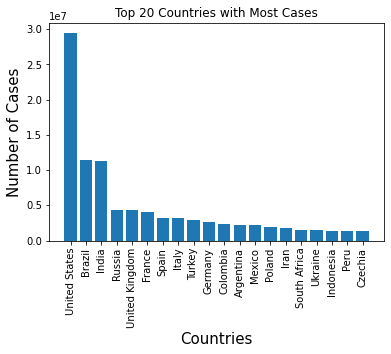

In [3]:
continents = ['World', 'Europe', 'North America', 'Asia', 'European Union', 'South America', 'Africa']
top20 = df[~df['location'].isin(continents)].groupby('location')['total_cases'].max().dropna().sort_values(ascending=False)[:20]

plt.title('Top 20 Countries with Most Cases')
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Number of Cases', fontsize=15)
plt.bar(top20.index, top20)
plt.xticks(rotation=90)
plt.show()

**(2)** Plot a histogram for daily deaths for any country you choose. Make three subplots for different bins.

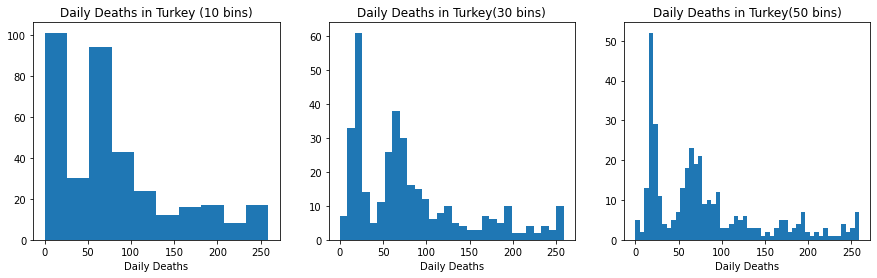

In [4]:
turkey = df[df['location'] == 'Turkey']

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title('Daily Deaths in Turkey (10 bins)')
plt.xlabel('Daily Deaths')
plt.hist(turkey['new_deaths'].dropna())

plt.subplot(1, 3, 2)
plt.title('Daily Deaths in Turkey(30 bins)')
plt.xlabel('Daily Deaths')
plt.hist(turkey['new_deaths'].dropna(), bins = 30)

plt.subplot(1, 3, 3)
plt.title('Daily Deaths in Turkey(50 bins)')
plt.xlabel('Daily Deaths')
plt.hist(turkey['new_deaths'].dropna(), bins = 50)

plt.show()

**(3)** Plot a scatter plot of new cases and new death for Germany and France.

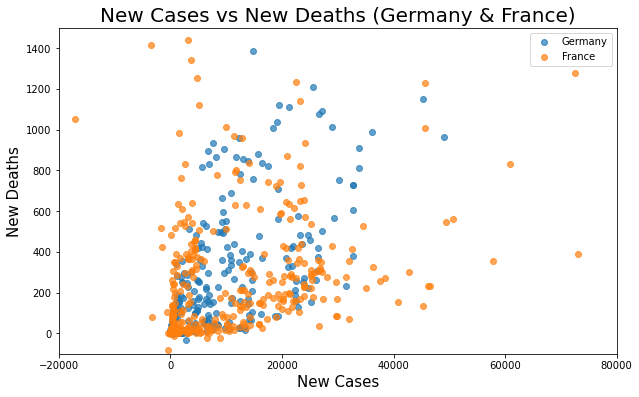

In [5]:
germany = df[df['location'] == 'Germany']
france = df[df['location'] == 'France']

plt.figure(figsize=(10, 6))
plt.title('New Cases vs New Deaths (Germany & France)', fontsize=20)
plt.scatter(germany['new_cases'], germany['new_deaths'], alpha = .7, label='Germany')
plt.scatter(france['new_cases'], france['new_deaths'], alpha = .7, label='France')
plt.xlabel('New Cases', fontsize=15)
plt.ylabel('New Deaths', fontsize=15)
plt.xlim(-20000,80000)
plt.ylim(-100, 1500)
plt.legend()
plt.show()

**(4)** Plot a boxplot for daily deaths for any country you choose.

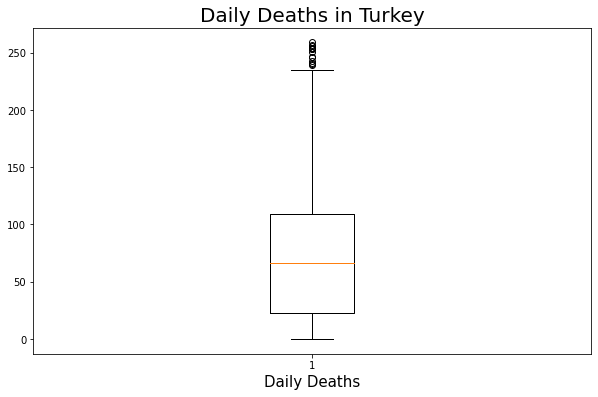

In [6]:
plt.figure(figsize=(10, 6))

plt.title('Daily Deaths in Turkey', fontsize=20)
plt.xlabel('Daily Deaths', fontsize=15)
plt.boxplot(turkey['new_deaths'].dropna())

plt.show()

**(5)** Calculate the total case for each continent and plot a pie chart 

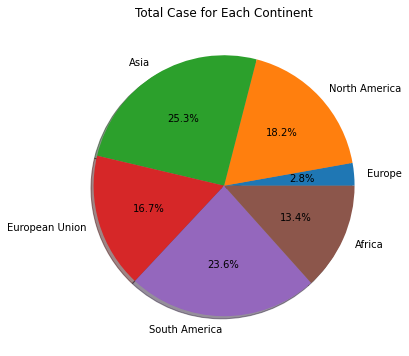

In [7]:
continents = ['Europe', 'North America', 'Asia', 'European Union', 'South America', 'Africa']
continent_cases = df[df['location'].isin(continents)].groupby('location')['total_cases'].max()

plt.figure(figsize=(10, 6))

plt.title('Total Case for Each Continent')
plt.pie(continent_cases, labels=continents, autopct='%1.1f%%', shadow=True)
plt.show()